# Installing libraries and Modules

In [ ]:
!pip install datasets
!pip install transformers
# !pip install sentencepiece
# !pip install pysentimiento

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.3 MB/s eta 0:00:00
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 15.7 MB/s eta 0:00:00
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 8.2 MB/s eta 0:00:00
  Using cached datasets-2.19.0-py3-none-any.whl (542 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 15.1 MB/s eta 0:00:00
  Using cached dill-0.3.8-py3-none-any.whl (116 kB)

In [ ]:
from google.colab import drive
from  IPython. display import clear_output
import optuna
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import pandas as pd
import numpy as np
import random
import  matplotlib. pyplot  as  plt
from tqdm import tqdm
import torch
import torch.optim as optim
import torch. nn.functional as F
import re
import warnings
warnings. filterwarnings('ignore')

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_all_df = pd.read_csv('/content/drive/MyDrive/EXIST 2024/Final/Tweet/Train/all/final_tweet_train_all.csv')
train_en_df = pd.read_csv('/content/drive/MyDrive/EXIST 2024/Final/Tweet/Train/en/final_tweet_train_en.csv')
train_es_df = pd.read_csv('/content/drive/MyDrive/EXIST 2024/Final/Tweet/Train/es/final_tweet_train_es.csv')

dev_all_df = pd.read_csv('/content/drive/MyDrive/EXIST 2024/Final/Tweet/Dev/all/final_tweet_dev_all.csv')
# test_all_df = pd.read_csv('/content/drive/MyDrive/EXIST 2024/Final/Tweet/Testsets/final_tweet_dev_all.csv')

In [ ]:
meme_train_all_df = pd.read_csv('/content/drive/MyDrive/EXIST 2024/final_meme_dataset.csv')

In [ ]:
meme_train_all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               4044 non-null   int64 
 1   id                       4044 non-null   int64 
 2   lang                     4044 non-null   object
 3   text                     4044 non-null   object
 4   meme                     4044 non-null   object
 5   path_memes               4044 non-null   object
 6   number_annotators        4044 non-null   int64 
 7   annotators               4044 non-null   object
 8   gender_annotators        4044 non-null   object
 9   age_annotators           4044 non-null   object
 10  ethnicities_annotators   4044 non-null   object
 11  study_levels_annotators  4044 non-null   object
 12  countries_annotators     4044 non-null   object
 13  labels_task4             4044 non-null   object
 14  labels_task5             4044 non-null  

In [ ]:
device = torch. device('cuda:0'  if  torch.cuda.is_available() else  'cpu')
print(f"computation will run on {device} now")

computation will run on cpu now


# Convert test JSON file to CSV file

In [ ]:
import json, csv


tweet_test_file_path = '/content/drive/MyDrive/EXIST 2024/Final/Testsets/Tweet/EXIST2023_test_clean.json'

# Read the JSON file
with open(tweet_test_file_path, 'r') as json_file:
  tweet_test_data = json.load(json_file)

In [ ]:
tweet_test_data

{'500001': {'id_EXIST': '500001',
  'lang': 'es',
  'tweet': '@Eurogamer_es Todo gamergate desde el desarrollo hasta los foros de juegos, clásico del mundo de los videojuegos.',
  'number_annotators': 6,
  'annotators': ['Annotator_810',
   'Annotator_811',
   'Annotator_812',
   'Annotator_813',
   'Annotator_814',
   'Annotator_815'],
  'gender_annotators': ['F', 'F', 'F', 'M', 'M', 'M'],
  'age_annotators': ['18-22', '23-45', '46+', '46+', '23-45', '18-22'],
  'ethnicities_annotators': ['Hispano or Latino',
   'White or Caucasian',
   'White or Caucasian',
   'Hispano or Latino',
   'White or Caucasian',
   'White or Caucasian'],
  'study_levels_annotators': ['High school degree or equivalent',
   'Master’s degree',
   'Master’s degree',
   'Bachelor’s degree',
   'Bachelor’s degree',
   'Bachelor’s degree'],
  'countries_annotators': ['Mexico',
   'Spain',
   'Italy',
   'United States',
   'Portugal',
   'Italy'],
  'split': 'TEST_ES'},
 '500002': {'id_EXIST': '500002',
  'lang': 

In [ ]:
# Open a CSV file for writing
with open('EXIT2024_tweet_test.csv', 'w', newline='') as file:
  test_csv_writer = csv.writer(file)

  # Write the header row
  headers = ['id', 'lang', 'tweet', 'split']
  test_csv_writer.writerow(headers)

  # Write the data rows
  for key, value in tweet_test_data.items():
    row = [
      key,
      value['lang'],
      value['tweet'],
      value['split']
    ]
    test_csv_writer.writerow(row)

In [ ]:
tweet_test_all = pd.read_csv('EXIT2024_tweet_test.csv')
tweet_test_all.head()

,id,lang,tweet,split
0,500001,es,@Eurogamer_es Todo gamergate desde el desarrol...,TEST_ES
1,500002,es,"@ArCaNgEl__23 @Benzenazi Hombre, no es compara...",TEST_ES
2,500003,es,yo buscando las empresas metidas en el gamerga...,TEST_ES
3,500004,es,"@jordirico Primero fue internet, luego el game...",TEST_ES
4,500005,es,@AlonsoQuijano12 Yo estuve metido en el gamerg...,TEST_ES


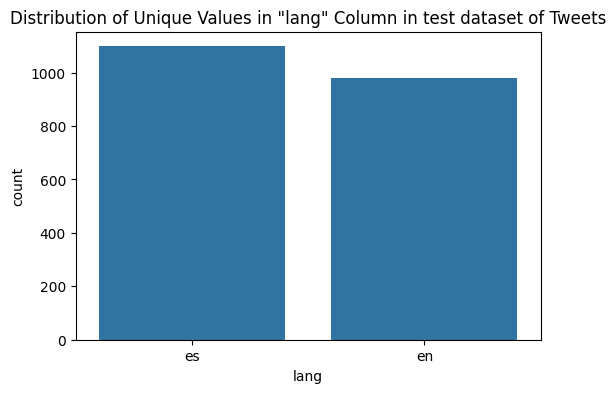

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='lang', data=tweet_test_all)
plt.title('Distribution of Unique Values in "lang" Column in test dataset of Tweets')
plt.show()

# Implementation

In [ ]:
def simple_preprocess(text):
  """
  pass the tweet data as a series. do not use apply function
  only preprocesses for replacing @USER and URLS
  """
  URL_RE = re.compile(r"https?:\/\/[\w\.\/\?\=\d&#%_:/-]+")
  HANDLE_RE = re.compile(r"@\w+")
  tweets = []
  for t in text:
    t = HANDLE_RE.sub("@user", t)
    t = URL_RE.sub("http", t)
    tweets.append(t)
  return tweets

In [ ]:
t1_train_all_df_sc = train_all_df.loc[:, ['id', 'lang', 'tweet', 'value_ttgt1s_data', 'value_ttgt1h_data']]
t1_train_all_df_sc.head()

,id,lang,tweet,value_ttgt1s_data,value_ttgt1h_data
0,100001,es,"@TheChiflis Ignora al otro, es un capullo.El p...","{""YES"": 0.8333333333333334, ""NO"": 0.1666666666...","""YES"""
1,100002,es,@ultimonomada_ Si comicsgate se parece en algo...,"{""NO"": 0.8333333333333334, ""YES"": 0.1666666666...","""NO"""
2,100003,es,"@Steven2897 Lee sobre Gamergate, y como eso ha...","{""NO"": 1.0, ""YES"": 0.0}","""NO"""
3,100004,es,@Lunariita7 Un retraso social bastante lamenta...,"{""NO"": 0.5, ""YES"": 0.5}",NaN
4,100005,es,@novadragon21 @icep4ck @TvDannyZ Entonces como...,"{""YES"": 0.6666666666666666, ""NO"": 0.3333333333...","""YES"""


In [ ]:
t1_train_all_df_sc.rename(columns={'value_ttgt1s_data': 'soft_label', 'value_ttgt1h_data': 'hard_label'}, inplace=True)

In [ ]:
t1_dev_all_df_sc = dev_all_df.loc[:, ['id', 'lang', 'tweet', 'value_tdgt1s_data', 'value_tdgt1h_data']]
t1_dev_all_df_sc.head()

,id,lang,tweet,value_tdgt1s_data,value_tdgt1h_data
0,300001,es,@Fichinescu La comunidad gamer es un antro de ...,"{""NO"": 0.5, ""YES"": 0.5}",NaN
1,300002,es,@anacaotica88 @MordorLivin No me acuerdo de lo...,"{""YES"": 0.8333333333333334, ""NO"": 0.1666666666...","""YES"""
2,300003,es,@cosmicJunkBot lo digo cada pocos dias y lo re...,"{""NO"": 1.0, ""YES"": 0.0}","""NO"""
3,300004,es,Also mientras les decia eso la señalaba y deci...,"{""NO"": 0.16666666666666666, ""YES"": 0.833333333...","""YES"""
4,300005,es,"And all people killed, attacked, harassed by ...","{""NO"": 0.8333333333333334, ""YES"": 0.1666666666...","""NO"""


In [ ]:
t1_dev_all_df_sc.rename(columns={'value_tdgt1s_data': 'soft_label', 'value_tdgt1h_data': 'hard_label'}, inplace=True)
t1_dev_all_df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1038 non-null   int64 
 1   lang        1038 non-null   object
 2   tweet       1038 non-null   object
 3   soft_label  1038 non-null   object
 4   hard_label  934 non-null    object
dtypes: int64(1), object(4)
memory usage: 40.7+ KB


In [ ]:
t4_train_all_df_sc = meme_train_all_df.loc[:, ['id', 'lang', 'text', 'task4_gold_hard', 'task4_gold_soft']]
t4_train_all_df_sc.head()

,id,lang,text,task4_gold_hard,task4_gold_soft
0,110001,es,2+2=5 MITO Albert Einstein tenía bajo rendimie...,YES,"{'YES': 1.0, 'NO': 0.0}"
1,110002,es,CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS,YES,"{'YES': 1.0, 'NO': 0.0}"
2,110003,es,ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...,NO,"{'YES': 0.3333333333333333, 'NO': 0.6666666666..."
3,110004,es,"Paises que ""apoyan"" los derechos de la mujer A...",-,"{'YES': 0.5, 'NO': 0.5}"
4,110005,es,Ya verás como este 8 de marzo hay uno que te s...,NO,"{'NO': 0.6666666666666666, 'YES': 0.3333333333..."


In [ ]:
t4_train_all_df_sc.rename(columns={'task4_gold_soft': 'soft_label', 'task4_gold_hard': 'hard_label'}, inplace=True)

In [ ]:
t4_train_all_df_sc.head()

,id,lang,text,hard_label,soft_label
0,110001,es,2+2=5 MITO Albert Einstein tenía bajo rendimie...,YES,"{'YES': 1.0, 'NO': 0.0}"
1,110002,es,CUANDO UNA MUJER VA A LUCHAR POR SUS DERECHOS,YES,"{'YES': 1.0, 'NO': 0.0}"
2,110003,es,ІЯ ЕГЕЯ Е MOA ¿El Partido Republicano busca pe...,NO,"{'YES': 0.3333333333333333, 'NO': 0.6666666666..."
3,110004,es,"Paises que ""apoyan"" los derechos de la mujer A...",-,"{'YES': 0.5, 'NO': 0.5}"
4,110005,es,Ya verás como este 8 de marzo hay uno que te s...,NO,"{'NO': 0.6666666666666666, 'YES': 0.3333333333..."


In [ ]:
t4_train_all_df_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4044 non-null   int64 
 1   lang        4044 non-null   object
 2   text        4044 non-null   object
 3   hard_label  4044 non-null   object
 4   soft_label  4044 non-null   object
dtypes: int64(1), object(4)
memory usage: 158.1+ KB


In [ ]:
t4_train_all_df_sc.rename(columns={'text': 'tweet'}, inplace=True)

In [ ]:
t4_train_all_df_sc.info()

In [ ]:
t1_train_all_df_sc.head()

In [ ]:
t1_train_all_df_sc.info()

In [ ]:
combined_t1_t4_data_df = pd.concat([t4_train_all_df_sc, t1_train_all_df_sc], ignore_index=True)

In [ ]:
combined_t1_t4_data_df.info()

In [ ]:
combined_t1_t4_data_df['soft_label'].unique()

array(["{'YES': 1.0, 'NO': 0.0}",
       "{'YES': 0.3333333333333333, 'NO': 0.6666666666666666}",
       "{'YES': 0.5, 'NO': 0.5}",
       "{'NO': 0.6666666666666666, 'YES': 0.3333333333333333}",
       "{'NO': 0.3333333333333333, 'YES': 0.6666666666666666}",
       "{'YES': 0.8333333333333334, 'NO': 0.16666666666666666}",
       "{'NO': 1.0, 'YES': 0.0}",
       "{'YES': 0.6666666666666666, 'NO': 0.3333333333333333}",
       "{'NO': 0.8333333333333334, 'YES': 0.16666666666666666}",
       "{'NO': 0.5, 'YES': 0.5}",
       "{'NO': 0.16666666666666666, 'YES': 0.8333333333333334}",
       "{'YES': 0.16666666666666666, 'NO': 0.8333333333333334}",
       '{"YES": 0.8333333333333334, "NO": 0.16666666666666666}',
       '{"NO": 0.8333333333333334, "YES": 0.16666666666666666}',
       '{"NO": 1.0, "YES": 0.0}', '{"NO": 0.5, "YES": 0.5}',
       '{"YES": 0.6666666666666666, "NO": 0.3333333333333333}',
       '{"YES": 1.0, "NO": 0.0}',
       '{"NO": 0.6666666666666666, "YES": 0.333333333333333

In [ ]:
combined_t1_t4_data_df['hard_label'].unique()

array(['"YES"', '"NO"', nan], dtype=object)

In [ ]:
combined_t1_t4_data_df['hard_label'] = combined_t1_t4_data_df['hard_label'].replace('YES', '"YES"')
combined_t1_t4_data_df['hard_label'] = combined_t1_t4_data_df['hard_label'].replace('NO', '"NO"')


In [ ]:
combined_t1_t4_data_df['hard_label'] = combined_t1_t4_data_df['hard_label'].replace('-', np.nan)

In [ ]:
combined_t1_t4_data_df['hard_label'].unique()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='lang', data=combined_t1_t4_data_df)
plt.title('Distribution of Unique Values in "lang" Column in Combined dataset')
plt.show()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import os.path
from os import path
from transformers import XLMRobertaForSequenceClassification, XLMRobertaTokenizer, TrainingArguments, Trainer
from datasets import Dataset
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
#instantiate label encoders
task1_encoder = LabelEncoder()

def task1_hard_encode(df):
    task1_encoder.fit(all_task1_hard_labels)
    df['hard_label'] = task1_encoder.transform(df['hard_label'])
    return df

def task1_hard_decode(df):
    df["hard_label"] = task1_encoder.inverse_transform(df["hard_label"])
    return df

In [ ]:
og_train1 = t1_train_all_df_sc[:10]
og_dev1 = t1_dev_all_df_sc[:10]
og_test1 = tweet_test_all[:10]

all_task1_hard_labels = pd.concat([og_train1["hard_label"], og_dev1["hard_label"]])
train1_df = task1_hard_encode(og_train1)

# print(train1_df.columns)
train1_df = train1_df[["tweet","hard_label"]].dropna()
train1_df = train1_df[train1_df['hard_label'] != 2]
train1_df["tweet"] = simple_preprocess(train1_df["tweet"])

dev1_df = task1_hard_encode(og_dev1)
dev1_df = dev1_df[["tweet","hard_label"]].dropna()
dev1_df = dev1_df[dev1_df['hard_label'] != 2]
dev1_df["tweet"] = simple_preprocess(dev1_df["tweet"])

test1_df = og_test1
test1_df = test1_df[["tweet"]]
# test1_df = test1_df[test1_df['hard_label'] != 2]
test1_df["tweet"] = simple_preprocess(test1_df["tweet"])

print("train1",train1_df.shape)
print(train1_df.head)
print("test1",test1_df.shape)
print(test1_df.head)

train1 (6064, 2)
<bound method NDFrame.head of                                                   tweet  hard_label
0     @user Ignora al otro, es un capullo.El problem...           1
1     @user Si comicsgate se parece en algo a gamerg...           0
2     @user Lee sobre Gamergate, y como eso ha cambi...           0
4     @user @user @user Entonces como así es el merc...           1
5     @user Aaah sí. Andrew Dobson. El que se dedicó...           0
...                                                 ...         ...
6915  idk why y’all bitches think having half your a...           1
6916  This has been a part of an experiment with @us...           1
6917  "Take me already" "Not yet. You gotta be ready...           1
6918       @user why do you look like a whore? /lh http           1
6919  ik when mandy says “you look like a whore” i l...           1

[6064 rows x 2 columns]>
test1 (2076, 1)
<bound method NDFrame.head of                                                   tweet
0     @us

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Combine train1df and test1df into a single dataframe
combined_df = pd.concat([train1_df, dev1_df], ignore_index=True)

# Shuffle the combined dataframe
combined_df_shuffled = combined_df.sample(frac=1, random_state=42)

# Split the shuffled dataframe into train, validation, and test dataframes with an 80-10-10 split
train_df, val_df = train_test_split(combined_df_shuffled, test_size=0.15, random_state=42)
test_df = test1_df

# Reset the indices of the dataframes
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
# Load the tokenizer and model
model_name = "sdadas/xlm-roberta-large-twitter"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2,ignore_mismatched_sizes=True)

tokenizer_config.json:   0%|          | 0.00/469 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at sdadas/xlm-roberta-large-twitter and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Set parameters
MAX_LENGTH = 128

# Define the training arguments
training_args = TrainingArguments(
    # accelerator = Accelerator(),
    output_dir="./output",
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=5.4734446759247935e-06,
    weight_decay=0.004881728253476856,
    metric_for_best_model="f1_score",
    greater_is_better=True,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch"
)

In [ ]:


def convert_to_dataset(df):
    df = {"text": df['tweet'].tolist(), "label": df["hard_label"].tolist()}
    dataset = Dataset.from_dict(df)
    return dataset

def convert_to_dataset_test(df):
    df = {"text": df['tweet'].tolist()}
    dataset = Dataset.from_dict(df)
    return dataset

In [ ]:
# Convert dataframe to dataset
train_dataset = convert_to_dataset(train_df)
val_dataset = convert_to_dataset(val_df)
test_dataset = convert_to_dataset_test(test_df)


# Create the datasets
train_encodings = tokenizer(train_dataset["text"], truncation=True, padding="max_length", max_length=MAX_LENGTH)
train_dataset = Dataset.from_dict({"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"], "label": train_dataset["label"]})

val_encodings = tokenizer(val_dataset["text"], truncation=True, padding="max_length", max_length=MAX_LENGTH)
val_dataset = Dataset.from_dict({"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"], "label": val_dataset["label"]})


test_encodings = tokenizer(test_dataset["text"], truncation=True, padding="max_length", max_length=MAX_LENGTH)
test_dataset = Dataset.from_dict({"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]})

In [ ]:
def compute_f1_score(pred):
    # pred is a tuple (predictions, labels)
    predictions, labels = pred
    # Compute the F1 score
    f1 = f1_score(labels, predictions.argmax(axis=1), average='macro')
    return {"f1_score": f1}

In [ ]:
# Define the trainer for each fold
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model for each fold
trainer.train()

In [ ]:
from scipy.special import softmax
from sklearn.metrics import accuracy_score, f1_score
# Get predictions on the validation set
val_predictions = trainer.predict(val_dataset)
val_pred_labels = np.argmax(val_predictions.predictions, axis=1)
val_true_labels = val_dataset["label"]

val_accuracy = accuracy_score(val_true_labels, val_pred_labels)
val_f1_score = f1_score(val_true_labels, val_pred_labels)

print("Validation Accuracy:", val_accuracy)
print("Validation F1 Score:", val_f1_score)